### 📊 Exploratory Data Analysis (EDA):

In [84]:
#Importing Libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as pl
from scipy import stats

For this analysis, I chose a open acess dataset available in Kaggle (link below) about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on.

Acess link: https://www.kaggle.com/datasets/mirichoi0218/insurance/code?datasetId=13720&sortBy=voteCount

- Data Loading and Verification:

In [99]:
df_data = pd.read_csv('insurance.csv')
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("\nData Columns:")
df_data.columns


Data Columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
print("\nNull values:")
df_data.isnull().sum()


Null values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
print("\nNull Values Percent:")
df_data.isnull().sum()/df_data.shape[0]


Null Values Percent:


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [6]:
print("\nData Information:")
df_data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print("\nStatistical Summary of Numerical Variables:")
df_data.describe()


Statistical Summary of Numerical Variables:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print("\nChecking if we have duplicates:", df_data.shape)
df_dup = df_data.drop_duplicates()
print("\nShape after drop duplicates:", df_dup.shape)



if df_data.shape == df_dup.shape:
    print("\nWe don't have duplicates in dataframe!")
else:
    print("\nWe have duplicates in dataframe!")


Checking if we have duplicates: (1338, 7)

Shape after drop duplicates: (1337, 7)

We have duplicates in dataframe!


In [9]:
duplicate = df_data[df_data.duplicated(keep=False)]
print("\nThe duplicate is:\n ", duplicate)


The duplicate is:
       age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


As we can see, duplicate rows are the same, so we can remove one of them without losing any important information.

In [100]:
df_data = df_data.drop_duplicates()
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Data Analysis and Interpretation:


The distribution of policyholder costs is: 
 count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


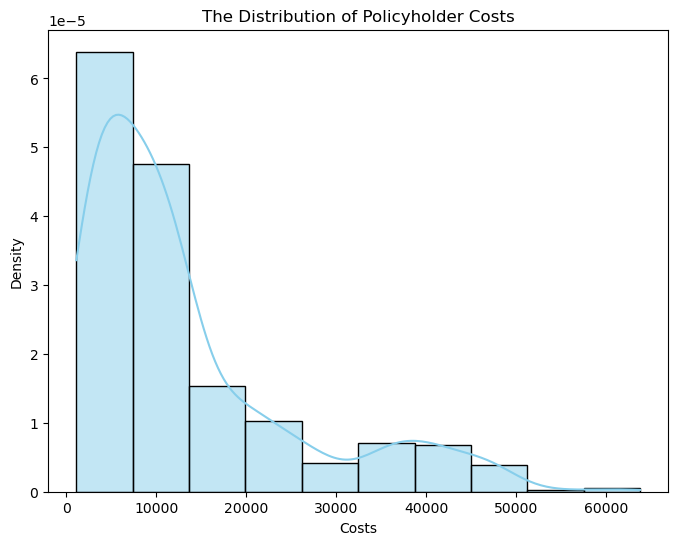

In [11]:
print("\nThe distribution of policyholder costs is: \n", df_data['charges'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df_data['charges'], kde=True, bins=10, color='skyblue', stat='density')
plt.title('The Distribution of Policyholder Costs')
plt.xlabel('Costs')
plt.ylabel('Density')
plt.show()

The distribution of cost values is not symmetrical; it is positively skewed. This means that the mean of the values is greater than the median, and the mode is lower than the mean and the median.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\4060038132.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_data.smoker == 'yes')]["charges"],color='c',ax=ax)
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\4060038132.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data

Text(0.5, 1.0, 'The Distribution of Policyholder Costs for Non-Smokers')

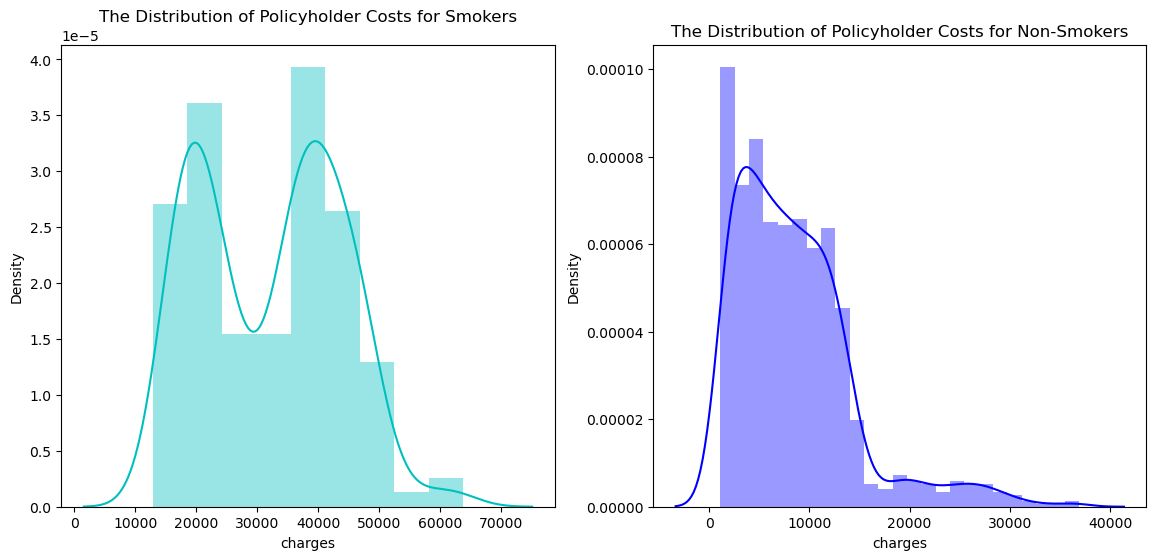

In [12]:
f= pl.figure(figsize=(14,6))

ax=f.add_subplot(121)
sns.distplot(df_data[(df_data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('The Distribution of Policyholder Costs for Smokers')

ax=f.add_subplot(122)
sns.distplot(df_data[(df_data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('The Distribution of Policyholder Costs for Non-Smokers')

### Left Chart (Smokers): 
- The histogram shows that the cost distribution for smokers is bimodal, meaning there are two peaks.
- The cost values for smokers are generally higher than for non-smokers.
- A significant number of smokers have very high charges, with a long right tail, indicating a right-skewed distribution.
### Right Chart (Non-Smokers)
- The cost distribution for non-smokers is unimodal, with a single peak at a lower cost range.
- Most non-smokers have relatively low medical costs, with few individuals reaching higher cost values.
- The distribution is also right-skewed, but much less pronounced than in smokers.
### Comparison and Interpretation
- Smokers have much higher medical costs, with a more dispersed and varied cost distribution.
- The presence of two peaks in the smoker's cost distribution suggests that some smokers incur moderate medical costs while others face very high expenses, likely due to smoking-related health issues.
- Non-smokers, on the other hand, generally have lower and more consistent medical expenses.
- This visualization highlights the significant impact of smoking on medical costs, as smokers are more likely to experience higher and more variable healthcare expenses.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\839253990.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_data.sex == 'female')]["age"],color='c',ax=ax)
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\839253990.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_d

Text(0.5, 1.0, 'The Distribution of Age for Male')

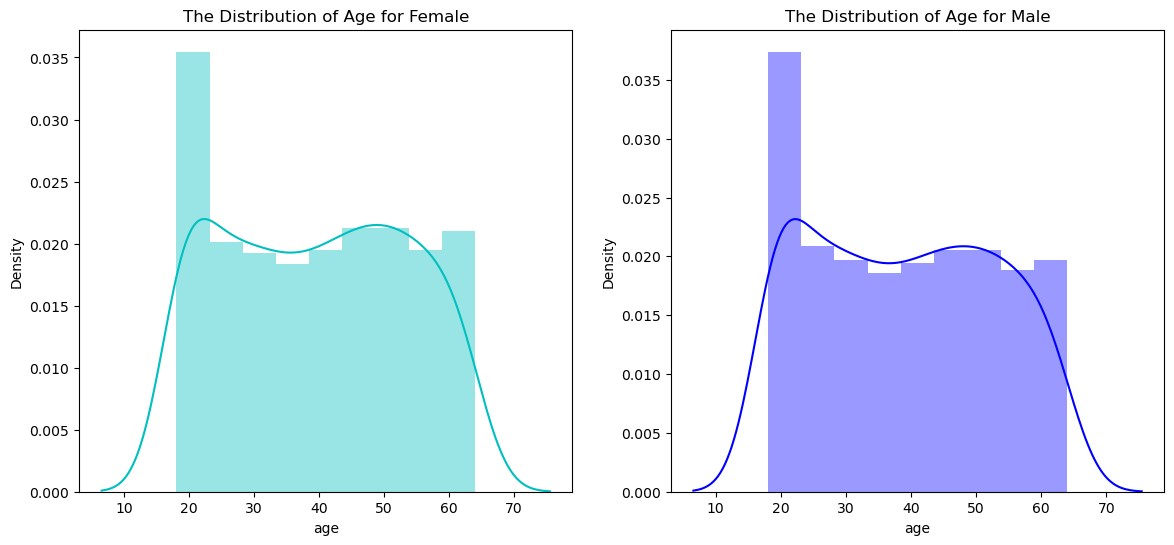

In [14]:
f= pl.figure(figsize=(14,6))

ax=f.add_subplot(121)
sns.distplot(df_data[(df_data.sex == 'female')]["age"],color='c',ax=ax)
ax.set_title('The Distribution of Age for Female')

ax=f.add_subplot(122)
sns.distplot(df_data[(df_data.sex == 'male')]['age'],color='b',ax=ax)
ax.set_title('The Distribution of Age for Male')

### Left Chart (Females) and Right Chart (Males):
- Both distributions show similar patterns, indicating a relatively balanced age distribution between genders.
- The histograms have a bimodal shape, suggesting two age groups with higher frequencies. One peak appears around 20 years old, and another around middle-aged individuals (approximately 50 years old).
- The distribution is fairly uniform between ages 20 and 60, meaning there is a consistent number of individuals across these age ranges.
- The presence of a peak around 20 years suggests that there is a concentration of younger individuals in the dataset.
- The tails of the distributions drop off at older ages, indicating fewer individuals in the dataset above 65-70 years.

### Comparison: 
- The distributions for males and females are quite similar, with no significant differences in the age distribution.
- Both groups have the same general age spread, meaning the dataset does not show a strong gender imbalance in terms of age representation.
- This visualization helps to understand the age demographics of the dataset and ensures that age distribution is well-represented across genders.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\3438041107.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_data.sex == 'female')&(df_data.smoker == 'yes')]["age"],color='red',ax=ax)
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\3438041107.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'The Distribution of Smokers Male by Age')

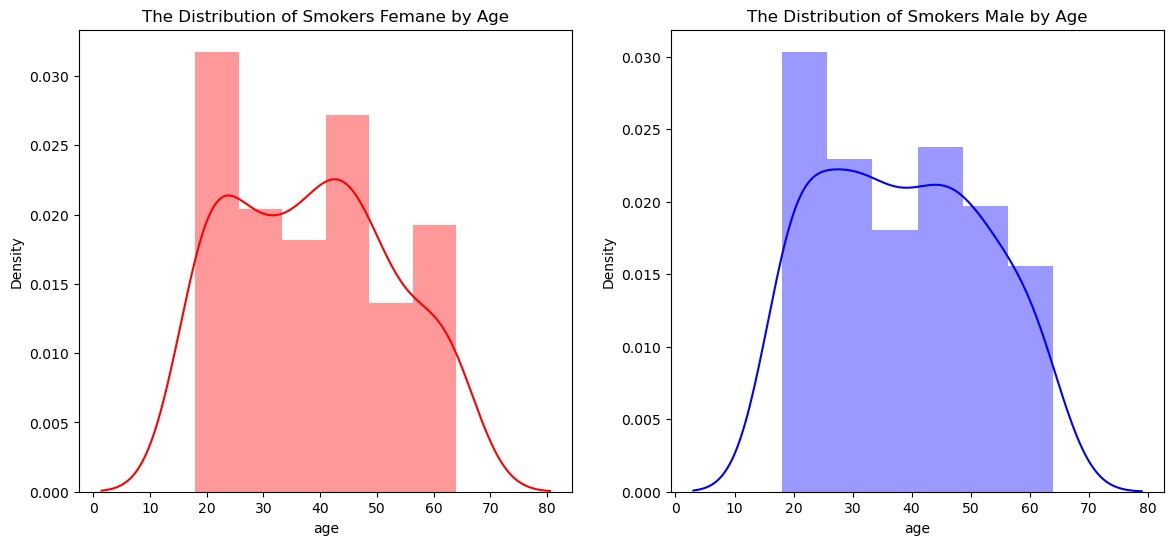

In [19]:
f= pl.figure(figsize=(14,6))

ax=f.add_subplot(121)
sns.distplot(df_data[(df_data.sex == 'female')&(df_data.smoker == 'yes')]["age"],color='red',ax=ax)
ax.set_title('The Distribution of Smokers Femane by Age')

ax=f.add_subplot(122)
sns.distplot(df_data[(df_data.sex == 'male')&(df_data.smoker == 'yes')]['age'],color='blue',ax=ax)
ax.set_title('The Distribution of Smokers Male by Age')

### Left Chart (Female Smokers): 
- The distribution is bimodal, with peaks around 20-25 years and another around 50 years.
- The presence of two peaks suggests that there are two main age groups of female smokers.
- The density gradually declines after 60 years, indicating fewer older female smokers.

### Right Chart (Male Smokers): 
- The distribution is similar to female smokers, also showing a bimodal shape with peaks around 20-25 years and another near 50 years.
- The overall pattern suggests that younger and middle-aged males are more likely to be smokers.
- The number of older male smokers (above 60) decreases significantly.

### Comparison and Interpretation: 
- Both male and female smokers have similar age distributions, with two dominant age groups: young adults (20-25) and middle-aged individuals (50s).
- The number of smokers declines as age increases, suggesting that either older individuals quit smoking or there are fewer smokers in older generations.
- The higher density around 20-25 years might indicate that smoking is more common among younger individuals.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\1184262208.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_data.sex == 'female')]["charges"],color='yellow',ax=ax)
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\1184262208.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

Text(0.5, 1.0, 'The Distribution of Policyholder Costs for Male')

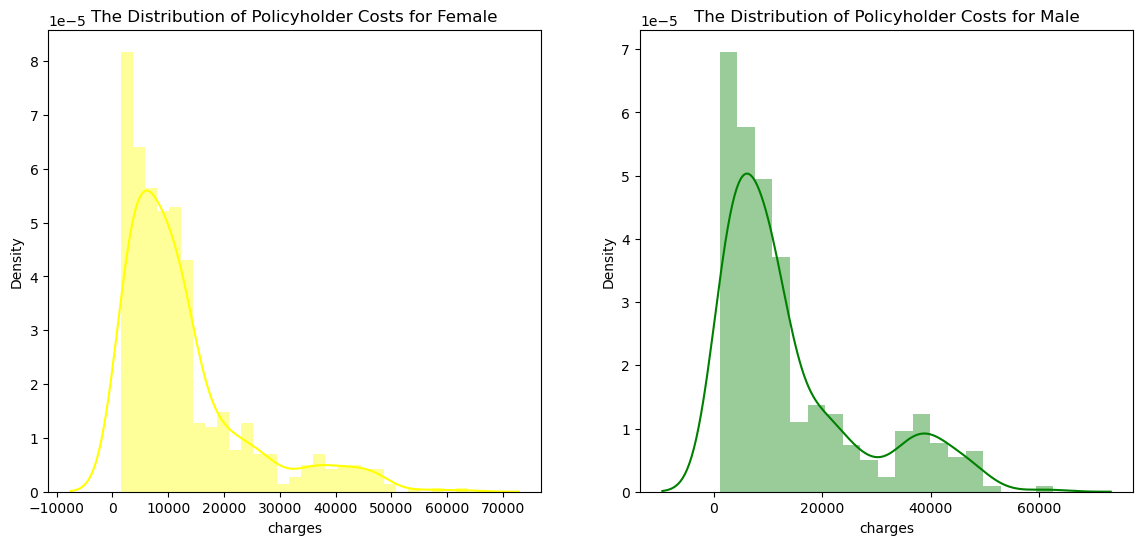

In [22]:
f= pl.figure(figsize=(14,6))

ax=f.add_subplot(121)
sns.distplot(df_data[(df_data.sex == 'female')]["charges"],color='yellow',ax=ax)
ax.set_title('The Distribution of Policyholder Costs for Female')

ax=f.add_subplot(122)
sns.distplot(df_data[(df_data.sex == 'male')]['charges'],color='green',ax=ax)
ax.set_title('The Distribution of Policyholder Costs for Male')

### Left Chart (Female Policyholders): 
- The distribution is right-skewed, meaning most individuals have lower policy costs, with a few having extremely high costs.
- The highest density is concentrated around 5,000 to 10,000, indicating that most female policyholders have relatively lower costs.
- A long tail extends beyond 40,000, meaning a few individuals face - significantly higher costs, possibly due to major medical expenses.

### Right Chart (Male Policyholders): 
- Similar to the female distribution, the male policyholder costs are also right-skewed with most individuals having lower costs.
- The peak is also around 5,000 to 10,000, indicating that most male policyholders fall within the same cost range as females.
- However, there seems to be a slightly larger spread in costs for males, with a notable group having expenses beyond 40,000 and even reaching over 60,000.

### Comparison and Interpretation:
- Both males and females have similar cost distributions, with most policyholders having relatively low costs and a few individuals experiencing high medical expenses.
- Males appear to have a slightly wider distribution, meaning there might be more high-cost cases among male policyholders than among females.
- The right-skewed nature suggests that a small percentage of individuals drive up overall medical costs, possibly due to severe medical conditions or higher healthcare utilization.

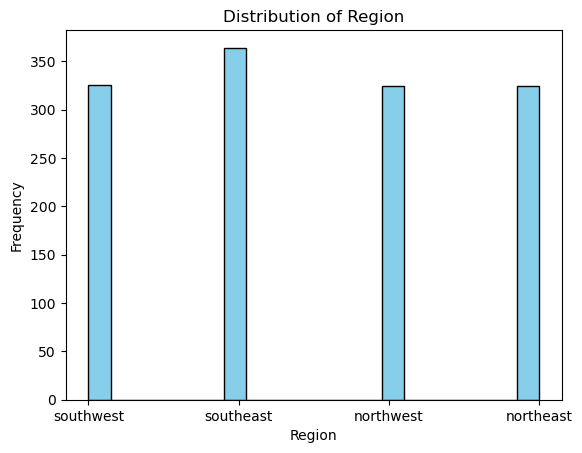

In [25]:
plt.hist(df_data['region'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Distribution of Region')
plt.show()

- The distribution of policyholders across regions is fairly balanced, with no extreme disparities.

- The southeast region has more policyholders than other regions, which could indicate a higher population density or a larger insured population.

- Since the differences are not very large, it suggests that policyholders are relatively evenly spread across all regions.

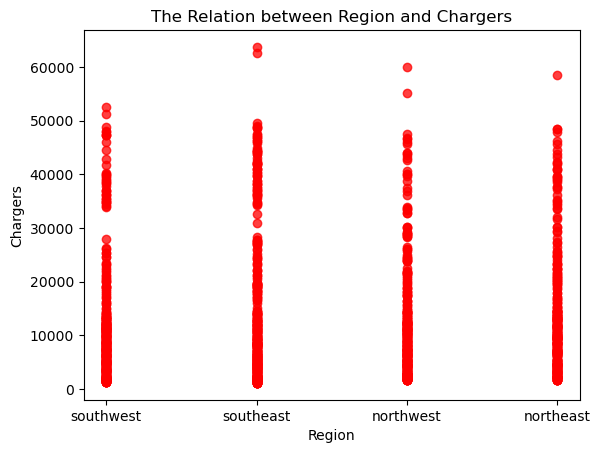

In [29]:
plt.scatter(df_data['region'], df_data['charges'], color='red',alpha=0.75)
plt.xlabel('Region')
plt.ylabel('Chargers')
plt.title('The Relation between Region and Chargers')
plt.show()

- There is no significant difference in the distribution of charges across regions, meaning location alone may not strongly influence policyholder costs.

- The presence of high-cost outliers in all regions suggests that certain individuals incur extremely high expenses, likely due to specific health conditions or smoking status.

- The southeast region has more extreme values, possibly indicating a higher prevalence of high-risk individuals in that area.

- This visualization helps in understanding whether geographical location affects medical costs, showing that while distribution is similar, some regions may have more high-cost cases than others.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\1299554213.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[(df_data.sex == 'female')]["bmi"],color='orange',ax=ax)
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\1299554213.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dat

Text(0.5, 1.0, 'The Distribution of Body Mass Index (BMI) for Male')

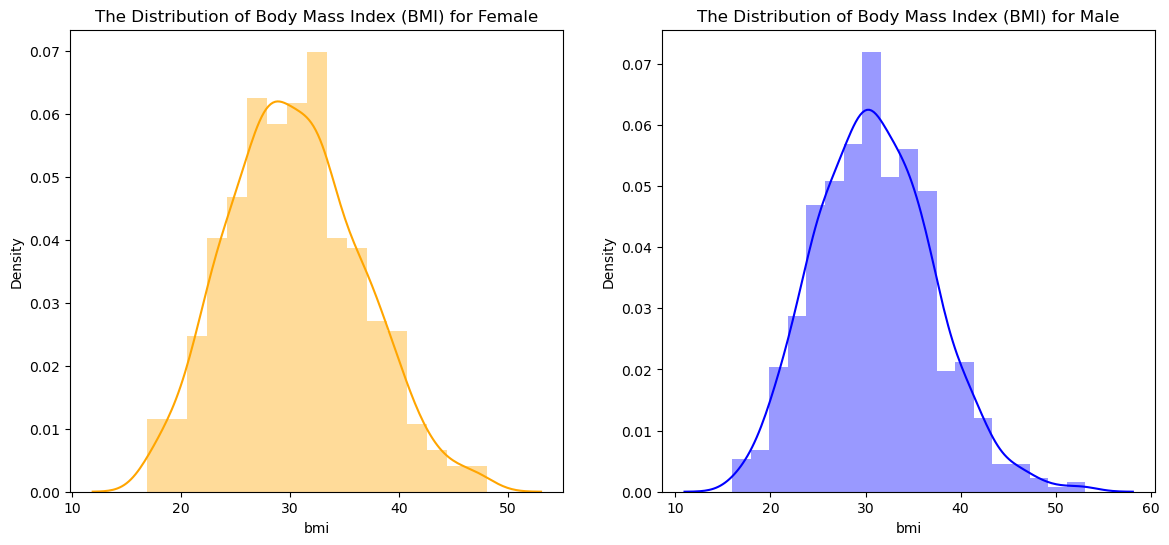

In [32]:
f= pl.figure(figsize=(14,6))

ax=f.add_subplot(121)
sns.distplot(df_data[(df_data.sex == 'female')]["bmi"],color='orange',ax=ax)
ax.set_title('The Distribution of Body Mass Index (BMI) for Female')

ax=f.add_subplot(122)
sns.distplot(df_data[(df_data.sex == 'male')]['bmi'],color='blue',ax=ax)
ax.set_title('The Distribution of Body Mass Index (BMI) for Male')

- The BMI distributions for males and females appear very similar, with a slightly broader spread for males.

- The central tendency (peak) of both distributions is around 30, meaning that BMI levels are quite similar between genders.

- The right-skewed nature suggests that while most individuals have BMI values around 30, there are some outliers with significantly higher BMI levels.

- This visualization helps in understanding BMI distribution by gender, indicating that both males and females in this dataset tend to have similar BMI levels, with a tendency towards overweight or obesity.

C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\2322585575.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data[df_data['sex'] == 'male']['bmi'], label='Male', shade=True, color='blue')
C:\Users\ellen\AppData\Local\Temp\ipykernel_11960\2322585575.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data[df_data['sex'] == 'female']['bmi'], label='Female', shade=True, color='orange')


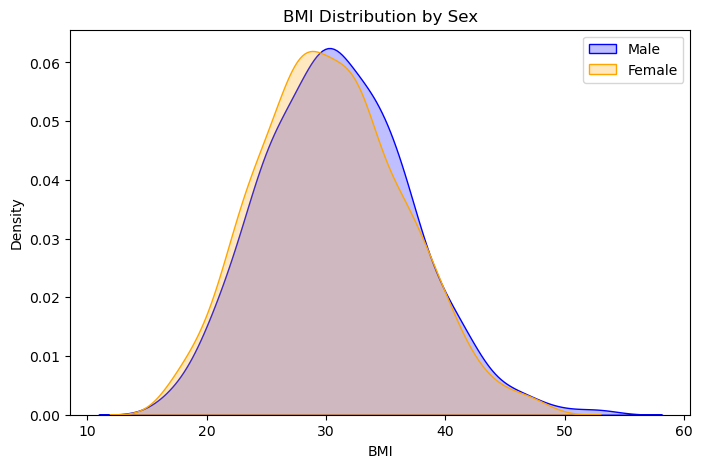

In [112]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_data[df_data['sex'] == 'male']['bmi'], label='Male', shade=True, color='blue')
sns.kdeplot(df_data[df_data['sex'] == 'female']['bmi'], label='Female', shade=True, color='orange')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution by Sex')
plt.legend()
plt.show()

### Comparison and Interpretation:
- Slight Differences in Distribution:
The female BMI distribution (orange) has a sharper peak, suggesting a slightly more concentrated range of BMI values.
The male BMI distribution (blue) is slightly more spread out, indicating greater variability.
- Higher BMI Values:
Both groups have individuals with BMI values above 40, meaning that some individuals fall in the obese range.
- Overall Similarity:
There is no major difference between the BMI distributions of males and females, as they largely overlap.
### Conclusion:
This visualization suggests that BMI distributions for males and females are quite similar, with slight differences in concentration and spread. The majority of individuals in both groups have BMI values around 30, indicating a prevalence of overweight individuals in the dataset.

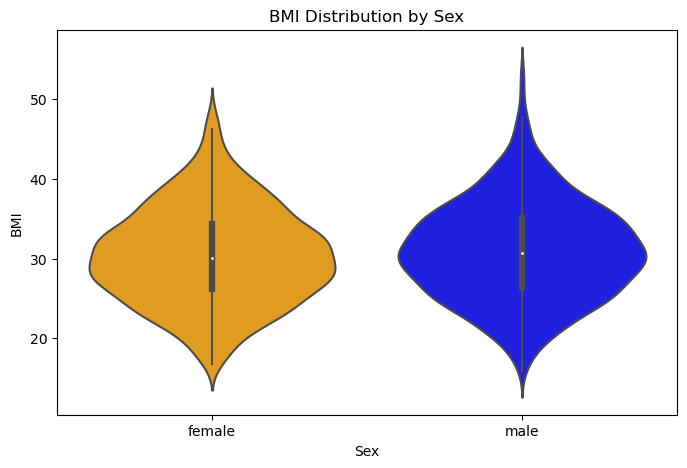

In [113]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='sex', y='bmi', data=df_data, palette={'male': 'blue', 'female': 'orange'})
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI Distribution by Sex')
plt.show()

### Comparison and Interpretation:

- Similar BMI distributions for males and females: 
Both groups have a concentration of BMI values around 25 to 35, meaning most individuals fall within the overweight or obese range.
- Slightly different spread:
Females (orange) have a wider spread in BMI values, with some individuals reaching above 45.
Males (blue) also have a similar distribution, but with slightly more density around 30 BMI.
- Outliers & Extreme Values:
Both groups contain a few individuals with very high BMI values (above 50), indicating extreme obesity cases.

### Conclusion:

The BMI distribution is similar for males and females, with most individuals concentrated in the overweight to obese range (25-35 BMI).
The violin plot effectively shows both the density and spread of BMI values, highlighting slight differences between genders.

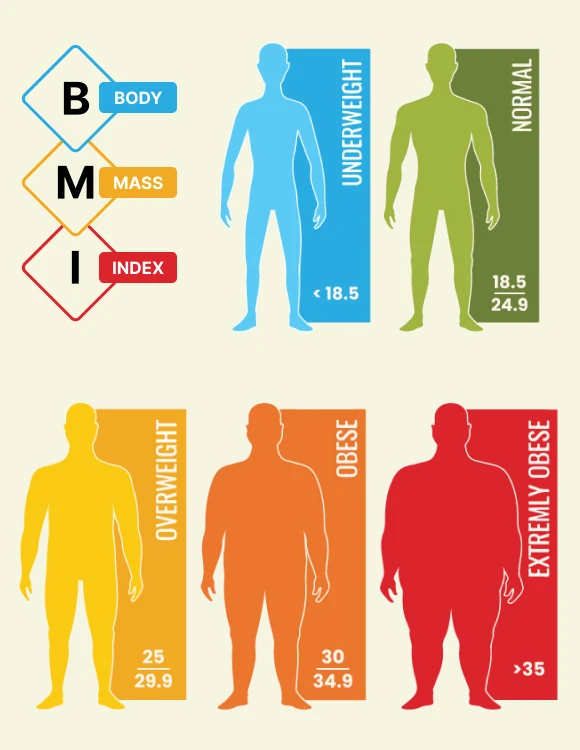

In [42]:
print("\nThe BMI median for Male is: \n", df_data.loc[df_data.sex=='male'].bmi.median())
print("\nThe BMI mean for Male is: \n", df_data.loc[df_data.sex=='male'].bmi.mean())


The BMI median for Male is: 
 30.69

The BMI mean for Male is: 
 30.94365185185183


In [40]:
print("\nThe BMI median for Female is: \n", df_data.loc[df_data.sex=='female'].bmi.median())
print("\nThe BMI mean for Female is: \n", df_data.loc[df_data.sex=='female'].bmi.mean())


The BMI median for Female is: 
 30.1075

The BMI mean for Female is: 
 30.377749244713023


In [71]:
print('How many people have children and smoke? \n', len(df_data.loc[(df_data.smoker == 'yes') & (df_data.children != 0)]))
print('How many people have children and non-smoke? \n', len(df_data.loc[(df_data.smoker == 'no') & (df_data.children != 0)]))

How many people have children and smoke? 
 159
How many people have children and non-smoke? 
 605


In [70]:
print('How many people do not have children and smoke? \n', len(df_data.loc[(df_data.smoker == 'yes') & (df_data.children == 0)]))
print('How many people do not have children and non-smoke? \n', len(df_data.loc[(df_data.smoker == 'no') & (df_data.children == 0)]))

How many people do not have children and smoke? 
 115
How many people do not have children and non-smoke? 
 458


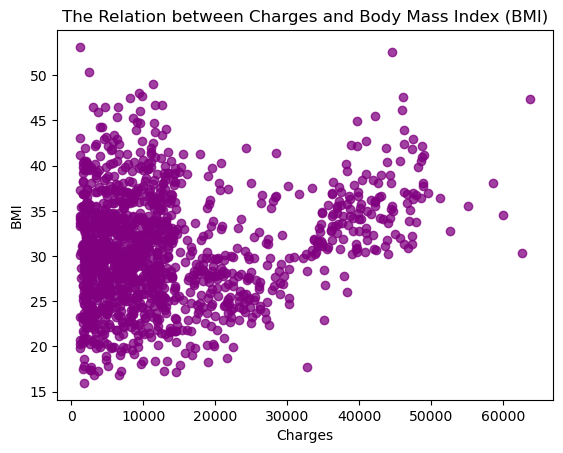

In [76]:
plt.scatter(df_data['charges'], df_data['bmi'], color='purple',alpha=0.75)
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('The Relation between Charges and Body Mass Index (BMI)')
plt.show()

C:\Users\ellen\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


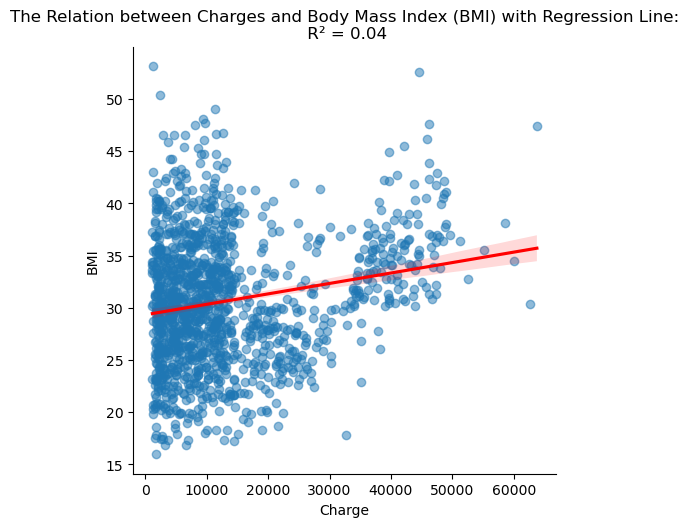

In [89]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_data['charges'], df_data['bmi'])
r2 = r_value ** 2

sns.lmplot(x='charges', y='bmi', data=df_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Charge')
plt.ylabel('BMI')
plt.title(f'The Relation between Charges and Body Mass Index (BMI) with Regression Line:\n R² = {r2:.2f}')
plt.show()

### Interpretation:

- Weak Positive Correlation: The regression line has a slight upward slope, indicating a small positive correlation between BMI and charges. This suggests that higher BMI may be associated with higher charges, but the effect is weak.
- Low R² Value (0.04): This means that only 4% of the variation in charges can be explained by BMI. Other factors (e.g., smoking, age, pre-existing conditions) likely have a much larger impact on medical costs.
- Scattered Data: The points are widely spread out, showing a lot of variability. This reinforces the idea that BMI alone is not a strong predictor of charges.

### Conclusion:

- While there is a slight trend indicating that individuals with higher BMI may have higher medical costs, the weak correlation (R² = 0.04) suggests that BMI is not a strong factor in predicting charges alone. Other factors likely contribute more significantly to variations in medical costs.

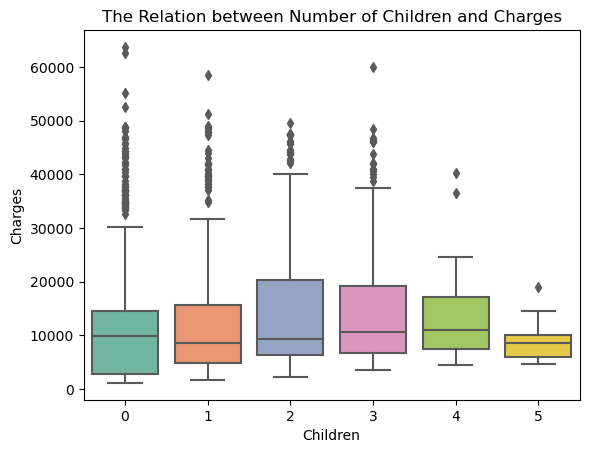

In [111]:
sns.boxplot(x='children', y='charges', data=df_data, palette='Set2')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title("The Relation between Number of Children and Charges")
plt.show()

### Interpretation:

- The distribution of charges does not show a clear increasing or decreasing trend based on the number of children.
- Families with 0, 1, or 2 children seem to have a slightly wider spread of charges, while those with 5 children have a narrower range with fewer high-cost outliers.

### Conclusion:

- The number of children does not appear to have a strong influence on medical charges.
- There is significant variability in charges across all groups, with some individuals having very high expenses in each category.
- Other factors (e.g., health conditions, smoking status, BMI) likely play a bigger role in determining medical costs.

### 📝 Concluding Remarks:

Keeping in mind that the main factors affecting health insurance costs are age, race, location, smoking status, and body weight, this exploratory analysis shows that the most significant impact on cost comes from whether a person is a smoker or a non-smoker, followed by age. The Body Mass Index (BMI), when analyzed in isolation, does not have a high impact on health insurance costs and the number of children does not appear to have a strong influence on medical charges.